In [1]:
import pandas as pd #for data manipulation 
import matplotlib.pyplot as plt #for our visualizations


In [34]:
data = pd.read_csv('ViewingActivity-sample.csv')  # Load the dataset into our notebook
data.head()  # Display the first few rows of the dataset

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Charlie,2013-03-20 5:17:53,0:00:05,NaN,Star Trek: Deep Space Nine: Season 5: Empok No...,NaN,Mac,0:00:05,Not latest view,US (United States)
1,Charlie,2013-03-20 4:27:45,0:44:31,NaN,Star Trek: Deep Space Nine: Season 5: Blaze of...,NaN,Mac,0:44:31,Not latest view,US (United States)
2,Charlie,2013-03-20 4:05:21,0:22:06,NaN,Star Trek: Deep Space Nine: Season 5: Children...,NaN,Mac,0:44:37,0:44:37,US (United States)
3,Charlie,2013-03-20 0:20:03,0:48:14,NaN,The Invisible War,NaN,Microsoft Xbox 360,0:53:18,0:53:18,US (United States)
4,Charlie,2013-03-20 0:10:31,0:04:51,NaN,The Invisible War,NaN,Mac,0:05:01,Not latest view,US (United States)


In [35]:
print(data.shape,"\n") #this sample contains 200 rows and 10 columns 


(200, 10) 



In [36]:
data = data.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)
data.head()  # Display the first few rows after dropping unnecessary columns


,Start Time,Duration,Title
0,2013-03-20 5:17:53,0:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...
1,2013-03-20 4:27:45,0:44:31,Star Trek: Deep Space Nine: Season 5: Blaze of...
2,2013-03-20 4:05:21,0:22:06,Star Trek: Deep Space Nine: Season 5: Children...
3,2013-03-20 0:20:03,0:48:14,The Invisible War
4,2013-03-20 0:10:31,0:04:51,The Invisible War


In [ ]:
print(data.dtypes)  # All the columns are in obj format so we have to convert the start time to datetime and Duration to timedelta for pandas to carry out calculations 


Start Time    str
Duration      str
Title         str
dtype: object


In [37]:
data['Start Time'] = pd.to_datetime(data['Start Time'], utc=True)
data['Duration'] = pd.to_timedelta(data['Duration'])
print(data.dtypes)

Start Time    datetime64[us, UTC]
Duration          timedelta64[us]
Title                         str
dtype: object


To convert the time to my local time i have to first turn the start time into an index using the set index function, change the time zone with the tz convert function  then  revert it back to a regular column using the reset index fucntion 

In [ ]:
# change the Start Time column into the dataframe's index
data = data.set_index('Start Time')

# convert from UTC timezone to east african time
data.index = data.index.tz_convert('Africa/Nairobi')

# reset the index so that Start Time becomes a column again
data = data.reset_index()

#double-check that it worked
data.head()

,Start Time,Duration,Title
0,2013-03-20 08:17:53+03:00,0 days 00:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...
1,2013-03-20 07:27:45+03:00,0 days 00:44:31,Star Trek: Deep Space Nine: Season 5: Blaze of...
2,2013-03-20 07:05:21+03:00,0 days 00:22:06,Star Trek: Deep Space Nine: Season 5: Children...
3,2013-03-20 03:20:03+03:00,0 days 00:48:14,The Invisible War
4,2013-03-20 03:10:31+03:00,0 days 00:04:51,The Invisible War


At this point we can now filter out for a specific show we want analytics for in my case its the office . 

In [ ]:

office = data[data['Title'].str.contains('The Office (U.S.)', regex=False)]
office.head()##successfully created an office df 

,Start Time,Duration,Title
9,2013-03-19 02:25:36+03:00,0 days 00:00:02,The Office (U.S.): Season 5: The Duel (Episode...
10,2013-03-19 02:04:22+03:00,0 days 00:21:07,The Office (U.S.): Season 5: Moroccan Christma...
11,2013-03-19 01:42:50+03:00,0 days 00:21:30,The Office (U.S.): Season 5: The Surplus (Epis...
12,2013-03-19 01:21:52+03:00,0 days 00:20:55,The Office (U.S.): Season 5: Frame Toby (Episo...
13,2013-03-19 01:20:53+03:00,0 days 00:00:55,The Office (U.S.): Season 5: Business Trip (Ep...


In [ ]:
office.shape #we can see the number of rows has significantly reduced from initial 200 

(137, 3)

In [ ]:
office = office[(office['Duration'] > '0 days 00:03:00')]
office.shape #the number of rows has further reduced after removing episodes watched for less than 3 minutes

(123, 3)

In [ ]:
office['Duration'].sum()  #total watch time for the office in the given period
##in this sample data i have watched a total of 1 day and nearly 15 hours of the office😅

Timedelta('1 days 14:43:40')

To now know when i watch the show the most

In [ ]:
office['weekday'] = office['Start Time'].dt.weekday
office['hour'] = office['Start Time'].dt.hour

office.head()

,Start Time,Duration,Title,weekday,hour
10,2013-03-19 02:04:22+03:00,0 days 00:21:07,The Office (U.S.): Season 5: Moroccan Christma...,1,2
11,2013-03-19 01:42:50+03:00,0 days 00:21:30,The Office (U.S.): Season 5: The Surplus (Epis...,1,1
12,2013-03-19 01:21:52+03:00,0 days 00:20:55,The Office (U.S.): Season 5: Frame Toby (Episo...,1,1
14,2013-03-18 23:29:22+03:00,0 days 00:20:15,The Office (U.S.): Season 5: Business Trip (Ep...,0,23
15,2013-03-18 23:07:57+03:00,0 days 00:21:21,The Office (U.S.): Season 5: Customer Survey (...,0,23


<Axes: title={'center': 'Office Episodes Watched by Day'}, xlabel='Day of the Week (Monday - Sunday)', ylabel='Number of Episodes Watched'>

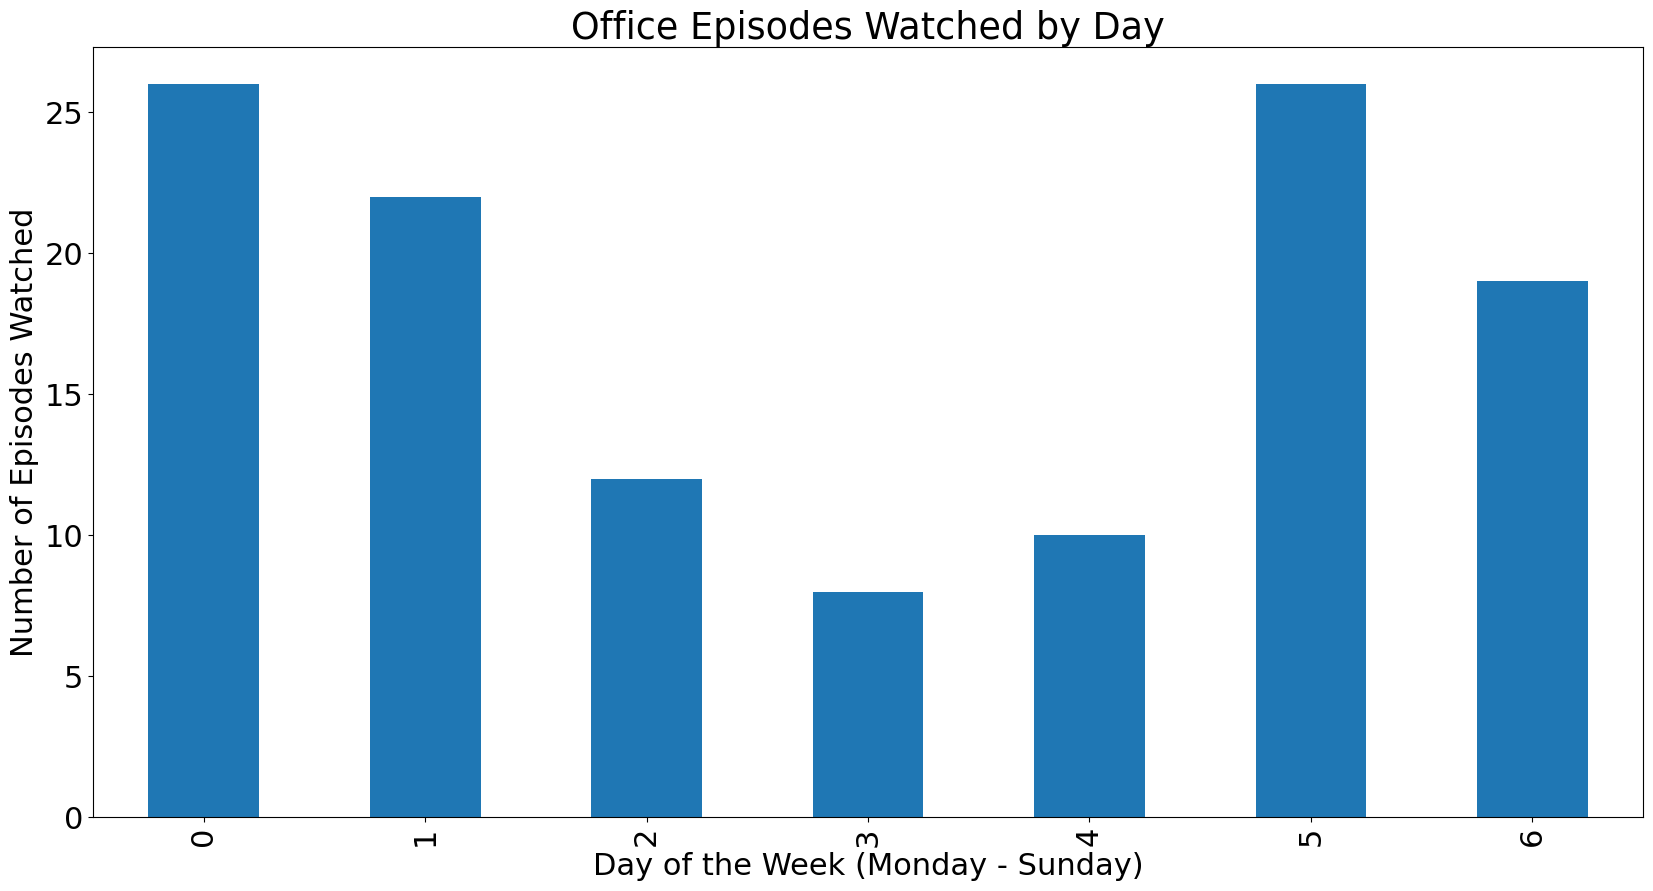

In [46]:
##ideally python will plot in descending order but i would prefer in the order form Monday to Sunday 
office['weekday'] = pd.Categorical(office['weekday'], categories= [0,1,2,3,4,5,6],ordered=True)

#to count number of episodes watched by day of the week
office_by_day = office['weekday'].value_counts()

# sort the index using our categorical, so that Monday (0) is first, Tuesday (1) is second, etc.
office_by_day = office_by_day.sort_index()

#update the font size to make it a bit larger and easier to read
plt.rcParams.update({'font.size': 22})

# plot office_by_day as a bar chart with the listed size and title
office_by_day.plot(kind='bar', figsize=(20,10), title='Office Episodes Watched by Day',xlabel='Day of the Week (Monday - Sunday)', ylabel='Number of Episodes Watched')

<Axes: title={'center': 'Office Episodes Watched by Hour'}, xlabel='Hour of the Day (0-23)', ylabel='Number of Episodes Watched'>

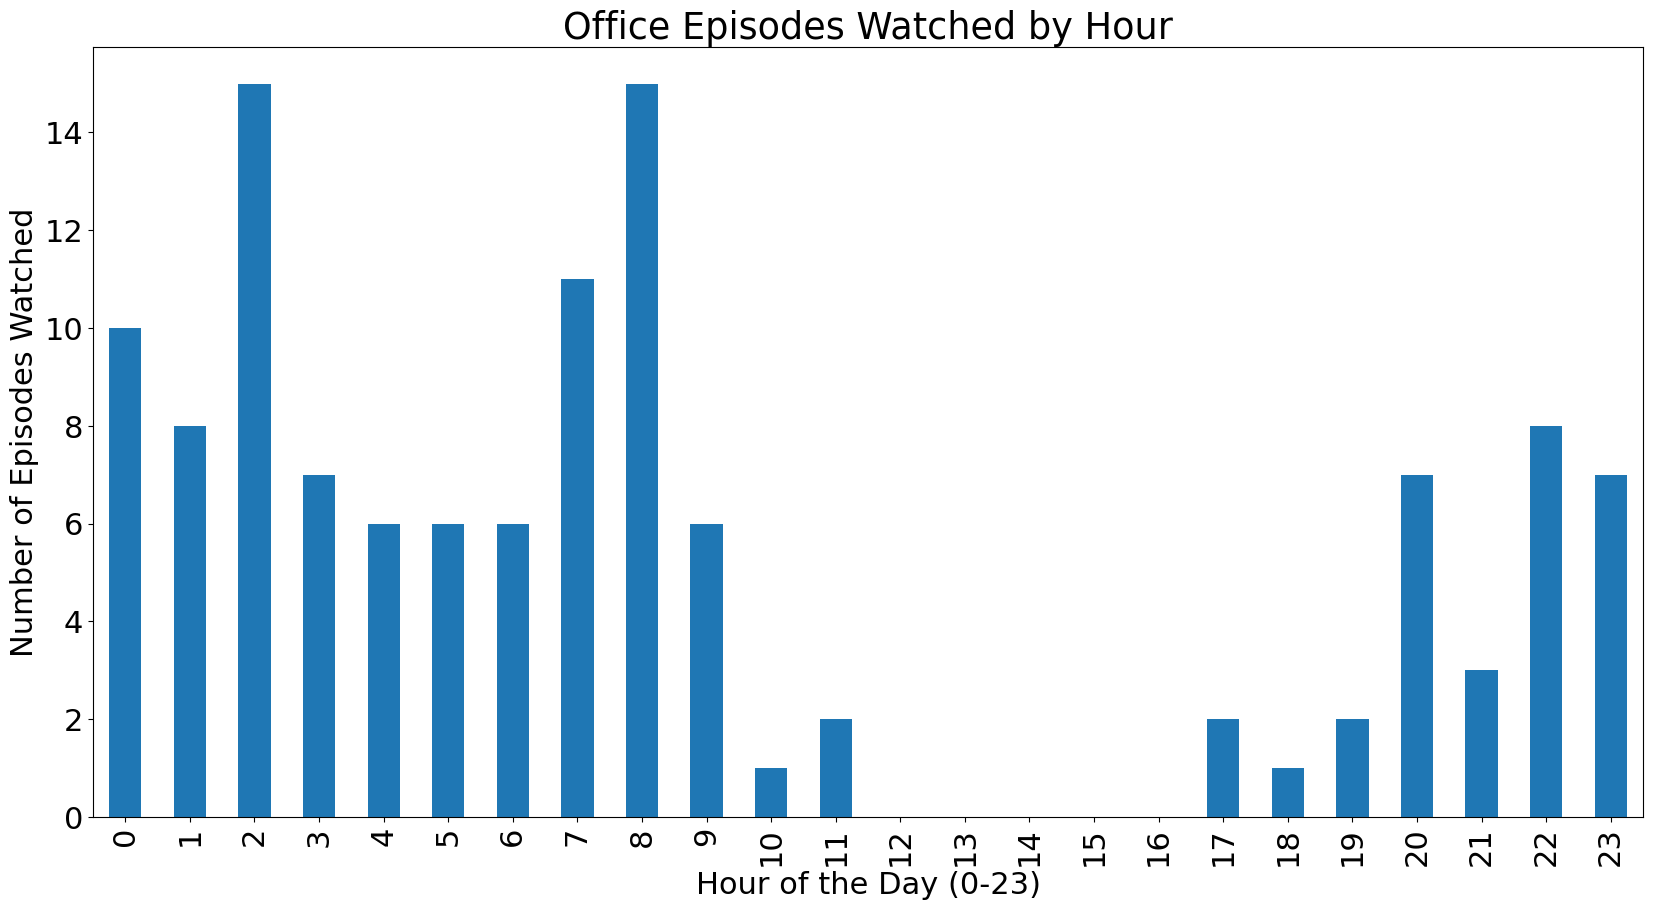

In [48]:
# set our categorical and define the order so the hours are plotted 0-23
office['hour'] = pd.Categorical(office['hour'], categories=
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    ordered=True)

# create office_by_hour and count the rows for each hour, assigning the result to that variable
office_by_hour = office['hour'].value_counts()

# sort the index using our categorical, so that midnight (0) is first, 1 a.m. (1) is second, etc.
office_by_hour = office_by_hour.sort_index()

# plot office_by_hour as a bar chart with the listed size and title
office_by_hour.plot(kind='bar', figsize=(20,10), title='Office Episodes Watched by Hour',xlabel='Hour of the Day (0-23)', ylabel='Number of Episodes Watched')

From the plot we can pick insight like the most watch active times are 2 am in the moring and 8 am in the moring 💀😅